Nome: Priscila Cunha Vazquez<br>
RA: 11.121.322-9

# Agrupamento

Para o agrupamento será utilizado o dataset das músicas da Taylor Swift no spotify. Ele foi editado para que as músicas diferentes não estejam repetidas, tornando-o mais eficaz. É um dataset com informações sobre cada música da Taylor Swift, como o álbum a que pertence, sua data de lançamento, track number no disco, acousticness, danceability, entre outros.

Para esta análise, o objetivo é tentar agrupar as músicas em clusters de acordo com características parecidas, como pertencimento ao mesmo álbum, dançabilidade, data de lançamento, etc.

## Agrupamento por KMeans

### Agrupamento por KMeans com PCA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# data = pd.read_csv("dinosaurs_cleaned.csv")
data = pd.read_csv("taylor_swift_spotify.csv")

data = data.drop(['num', 'id', 'uri'], axis=1)

print(data.to_string())

#separa as entradas e a saida
# usando como entrada a dieta, periodo, onde viveu, tipo, tamanho e taxonomia
entrada = data.iloc[:,1:]
# usando como saida o nome do dinossauro
saida = data.iloc[:,0]

#Transforma a saida e entradas que sao em palavras em dados numericos
label_encoder = LabelEncoder()
saida_num = label_encoder.fit_transform(saida)

# Converter as colunas categóricas das entradas em numéricas
entrada_num = pd.get_dummies(entrada, drop_first=True)

padronizado = StandardScaler()
entrada_padronizada = padronizado.fit_transform(entrada_num)

pca = PCA(n_components=2)
duas_dimensoes = pca.fit_transform(entrada_padronizada)


                                                                                     name                                         album release_date  track_number  acousticness  danceability  energy  instrumentalness  liveness  loudness  speechiness    tempo  valence  popularity  duration_ms
0                                                           Fortnight (feat. Post Malone)  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             1      0.502000         0.504   0.386          0.000015    0.0961   -10.976       0.0308  192.004   0.2810          82       228965
1                                                           The Tortured Poets Department  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             2      0.048300         0.604   0.428          0.000000    0.1260    -8.441       0.0255  110.259   0.2920          79       293048
2                                                    My Boy Only Breaks His Favorite Toys  THE TORTURED POETS DEPARTMENT:

Text(0, 0.5, 'inertia')

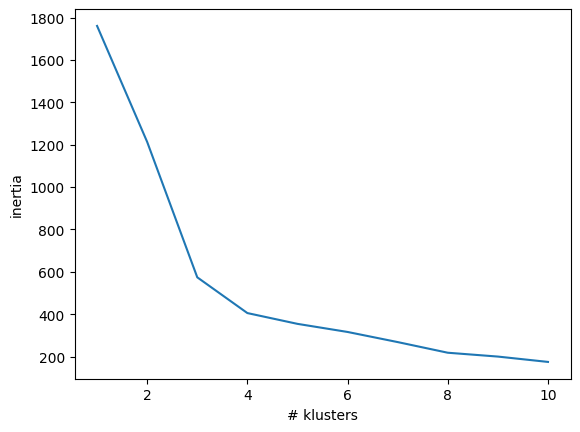

In [2]:
inertia=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(duas_dimensoes)
    inertia.append(kmeans.inertia_)

plt.plot(list(range(1,11)), inertia)
plt.xlabel("# klusters")
plt.ylabel("inertia")

In [3]:
# Pelo metodo do cotovelo, podemos utilizar o K (número de clusters) como sendo aproximadamente 4.
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(duas_dimensoes)
solucao = kmeans.predict(duas_dimensoes)

import plotly.express as px

# Criando o gráfico interativo
fig = px.scatter(x=duas_dimensoes[:, 0], y=duas_dimensoes[:, 1], color=solucao)
fig.update_layout(title="KMeans")
fig.show()

# Criando o gráfico interativo do dataset real
fig = px.scatter(x=duas_dimensoes[:, 0], y=duas_dimensoes[:, 1], color=saida_num)
fig.update_layout(title="Dataset Real")
fig.show()

Testes para verificar a qualidade do agrupamento:

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Quanto mais próximo de 1 for o coeficiente de silhueta, melhor será a qualidade do agrupamento.
# Calcular o coeficiente de silhueta
silhouette = silhouette_score(entrada_num, solucao)
print(f"Coeficiente de Silhueta: {silhouette}")

# Um valor menor do DBI indica uma melhor separação entre os clusters e maior coesão interna.
# Calcular o índice de Davies-Bouldin
dbi = davies_bouldin_score(entrada_num, solucao)
print(f"Índice de Davies-Bouldin: {dbi}")

# Um valor maior indica uma melhor separação entre os clusters, ou seja, os clusters são mais bem definidos.
# Calcular o índice de Calinski-Harabasz
chi = calinski_harabasz_score(entrada_num, solucao)
print(f"Índice de Calinski-Harabasz: {chi}")

Coeficiente de Silhueta: -0.0779630663848938
Índice de Davies-Bouldin: 3.4700398570654016
Índice de Calinski-Harabasz: 15.295681586447035


A partir desses testes, o que é possível verificar é que o agrupamento não está bom. O coeficiente de silhueta negativo indica que varios elementos foram agrupados erroneamente, e o índice de Calinski-Harabasz não está tão alto quanto poderia; assim, mesmo que os clusters estejam bem feitos nos gráficos, provavelmente não estão bem separdos. Isso mostra que talvez as características que o PCA escolheu não sejam as melhores para as análises.

### Agrupamento KMeans sem PCA nem Feature Scaling

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# carregar o dataset
data = pd.read_csv("taylor_swift_spotify.csv")
# remove as colunas que nao serao utilizadas
data = data.drop(['num', 'id', 'uri'], axis=1)

print(data.to_string())

#separa as entradas e a saida
entrada = data.iloc[:,1:11]
# usando como saida o nome das musicas
saida = data.iloc[:,0]

#Transforma a saida e entradas que sao em palavras em dados numericos
label_encoder = LabelEncoder()
saida_num = label_encoder.fit_transform(saida)

# Converter as colunas categóricas das entradas em numéricas
entrada_num = pd.get_dummies(entrada, drop_first=True)


                                                                                     name                                         album release_date  track_number  acousticness  danceability  energy  instrumentalness  liveness  loudness  speechiness    tempo  valence  popularity  duration_ms
0                                                           Fortnight (feat. Post Malone)  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             1      0.502000         0.504   0.386          0.000015    0.0961   -10.976       0.0308  192.004   0.2810          82       228965
1                                                           The Tortured Poets Department  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             2      0.048300         0.604   0.428          0.000000    0.1260    -8.441       0.0255  110.259   0.2920          79       293048
2                                                    My Boy Only Breaks His Favorite Toys  THE TORTURED POETS DEPARTMENT:

Text(0, 0.5, 'inertia')

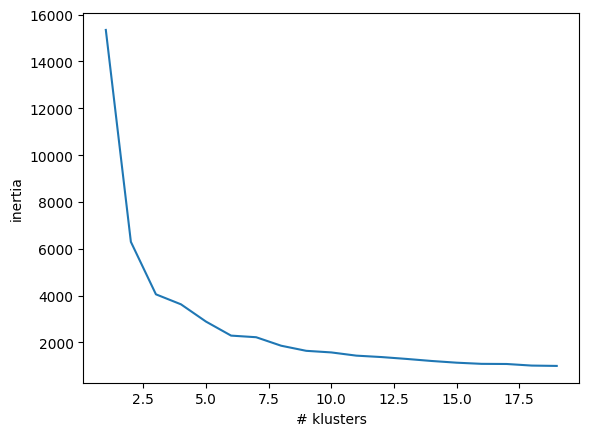

In [6]:
# Iniciar a lista de inércias para o método do cotovelo
inertia = []
for i in range(1, 20):  
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(entrada_num)  # Usando diretamente os dados de entrada numéricos
    inertia.append(kmeans.inertia_)
    
# Plotar o gráfico do Método do Cotovelo
plt.plot(list(range(1,20)), inertia)
plt.xlabel("# klusters")
plt.ylabel("inertia")

In [7]:
# De acordo com o metodo do cotovelo, não se ve de maneira determinada onde que a inercia se estabilizaria para definir 
# o K; assim, foi escolhido aproximadamente 100 clusters.
kmeans = KMeans(n_clusters=5, n_init='auto')
kmeans.fit(entrada_num)
solucao = kmeans.predict(entrada_num)

# Criando o gráfico interativo do KMeans com Plotly
import plotly.express as px

# Criando o gráfico interativo do KMeans
fig = px.scatter(x=entrada_num.iloc[:, 0], y=entrada_num.iloc[:, 1], color=solucao)
fig.update_layout(title="KMeans")
fig.show()

# Criando o gráfico interativo do dataset real
fig = px.scatter(x=entrada_num.iloc[:, 0], y=entrada_num.iloc[:, 1], color=saida_num)
fig.update_layout(title="Dataset Real")
fig.show()

Testes para verificar a qualidade do agrupamento


In [8]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Quanto mais próximo de 1 for o coeficiente de silhueta, melhor será a qualidade do agrupamento.
# Calcular o coeficiente de silhueta
silhouette = silhouette_score(entrada_num, solucao)
print(f"Coeficiente de Silhueta: {silhouette}")


# Um valor menor do DBI indica uma melhor separação entre os clusters e maior coesão interna.
# Calcular o índice de Davies-Bouldin
dbi = davies_bouldin_score(entrada_num, solucao)
print(f"Índice de Davies-Bouldin: {dbi}")

# Um valor maior indica uma melhor separação entre os clusters, ou seja, os clusters são mais bem definidos.
# Calcular o índice de Calinski-Harabasz
chi = calinski_harabasz_score(entrada_num, solucao)
print(f"Índice de Calinski-Harabasz: {chi}")

Coeficiente de Silhueta: 0.30039578924087923
Índice de Davies-Bouldin: 1.0495832765908275
Índice de Calinski-Harabasz: 271.3381215446062


A partir desses testes, é possível verificar que sem o PCA e sem o Feature Scaling o método teve um desempenho muito bom. O coeficiente de silhueta poderia ser melhor, por estar mais próximo de zero, mas está acima da metade, mostrando um desempenho razoável. Enquanto isso, o DBI foi baixo e o índice de Calinski-Harabasz foi bem alto - ambos indicadores de um bom desempenho na formação de clusters.<br>
Assim, foi melhor que sua variante com PCA e Feature Scaling, porém foi necessário selecionar apenas algumas colunas para a análise, ou então o método não era capaz de formar os clusters; este problema é decorrido da limitação do algorítimo utilizar 2 dimensões. Com o PCA é possível fazer um escalonamento, selecionando dados diversos, mesmo que com certa perda, o que sem ele não é possível.

## Agrupamento por DBSCAN

### Agrupamento por DBSCAN com PCA e Feature Scaling

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import StandardScaler

# carregar o dataset
data = pd.read_csv("taylor_swift_spotify.csv")
# remove as colunas que nao serao utilizadas
data = data.drop(['num', 'id', 'uri'], axis=1)

print(data.to_string())

#separa as entradas e a saida
entrada = data.iloc[:,1:]
# usando como saida o nome das musicas
saida = data.iloc[:,0]

# Transformar as variáveis categóricas em numéricas
label_encoder = LabelEncoder()
saida_num = label_encoder.fit_transform(saida)
entrada_num = pd.get_dummies(entrada, drop_first=True)

# Normalizar os dados
scaler = StandardScaler()
entrada_normalizada = scaler.fit_transform(entrada_num)

# Reduzir a dimensionalidade com PCA para visualização em 2D
pca = PCA(n_components=2)
entrada_pca = pca.fit_transform(entrada_normalizada)

                                                                                     name                                         album release_date  track_number  acousticness  danceability  energy  instrumentalness  liveness  loudness  speechiness    tempo  valence  popularity  duration_ms
0                                                           Fortnight (feat. Post Malone)  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             1      0.502000         0.504   0.386          0.000015    0.0961   -10.976       0.0308  192.004   0.2810          82       228965
1                                                           The Tortured Poets Department  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             2      0.048300         0.604   0.428          0.000000    0.1260    -8.441       0.0255  110.259   0.2920          79       293048
2                                                    My Boy Only Breaks His Favorite Toys  THE TORTURED POETS DEPARTMENT:

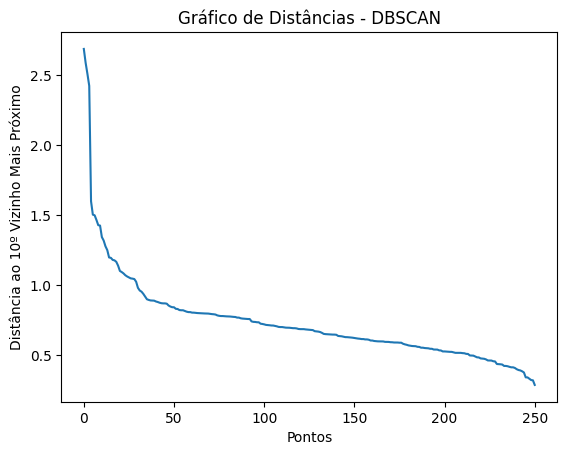

In [10]:
# Ajuste de vizinhança para encontrar o valor ideal de `eps`
neighbors = NearestNeighbors(n_neighbors=10)
neighbors.fit(entrada_pca)
distances, indices = neighbors.kneighbors(entrada_pca)

# Plotar o gráfico de distâncias para detectar o "cotovelo"
distances = sorted(distances[:, -1], reverse=True)
plt.plot(distances)
plt.xlabel('Pontos')
plt.ylabel('Distância ao 10º Vizinho Mais Próximo')
plt.title('Gráfico de Distâncias - DBSCAN')
plt.show()

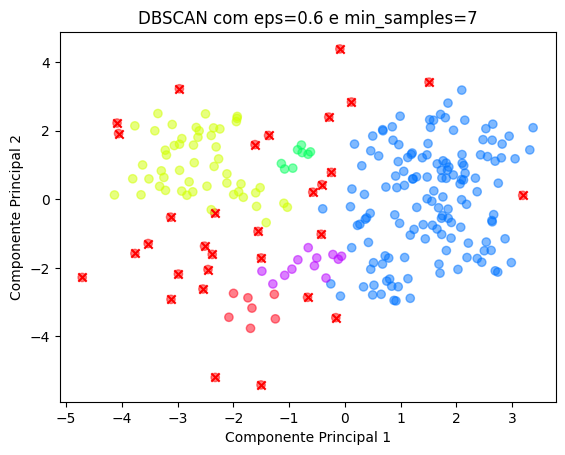

In [11]:
eps = 0.6
min_samples = 7

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
solucao_dbscan = dbscan.fit_predict(entrada_pca)

plt.scatter(entrada_pca[:, 0], entrada_pca[:, 1], c=solucao_dbscan, cmap='hsv', alpha=0.5)
plt.scatter(entrada_pca[solucao_dbscan == -1, 0], entrada_pca[solucao_dbscan == -1, 1], c='red', marker='x')
plt.title(f"DBSCAN com eps={eps} e min_samples={min_samples}")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


In [12]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Quanto mais próximo de 1 for o coeficiente de silhueta, melhor será a qualidade do agrupamento.
# Calcular o coeficiente de silhueta
silhouette = silhouette_score(entrada_pca, solucao_dbscan)
print(f"Coeficiente de Silhueta: {silhouette}")


# Um valor menor do DBI indica uma melhor separação entre os clusters e maior coesão interna.
# Calcular o índice de Davies-Bouldin
dbi = davies_bouldin_score(entrada_pca, solucao_dbscan)
print(f"Índice de Davies-Bouldin: {dbi}")

# Um valor maior indica uma melhor separação entre os clusters, ou seja, os clusters são mais bem definidos.
# Calcular o índice de Calinski-Harabasz
chi = calinski_harabasz_score(entrada_pca, solucao_dbscan)
print(f"Índice de Calinski-Harabasz: {chi}")

Coeficiente de Silhueta: 0.10094519018314894
Índice de Davies-Bouldin: 1.6805805421937385
Índice de Calinski-Harabasz: 62.21069921008611


A partir da análise dos índices para testes do clusteriing, é possível concluir que este métod de DBSCAN com a utilização do PCA e de Feature Scaling foi razoavelmente boa. Com um coeficiente de silhueta ainda baixo, os pontos estão próximos das fronteiras entre os clusters, ou seja, os clusters podem não ser bem definidos. O DBI indica que existe alguma separação entre os clusters, mas que ainda poderia melhorar, assim como o indicado pelo Índice de Calinski-Harabasz. 
<br>
Isso se deve provavelmente à grande dificuldade presente para encontrar o equilíbrio entre a distância máxima entre dois pontos para pertencerem ao mesmo cluster e a quantidade mínima de elementos para formar um cluster: ou muitos elementos eram dados como ruídos, ou ele formava apenas um cluster. 

### Agrupamento por DBSCAN sem PCA e sem Feature Scaling

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN

# carregar o dataset
data = pd.read_csv("taylor_swift_spotify.csv")
# remove as colunas que nao serao utilizadas
data = data.drop(['num', 'id', 'uri'], axis=1)

print(data.to_string())

#separa as entradas e a saida
entrada = data.iloc[:,1:6]
# usando como saida o nome das musicas
saida = data.iloc[:,0]

# Transformar as variáveis categóricas em numéricas
label_encoder = LabelEncoder()
saida_num = label_encoder.fit_transform(saida)
entrada_num = pd.get_dummies(entrada, drop_first=True)

                                                                                     name                                         album release_date  track_number  acousticness  danceability  energy  instrumentalness  liveness  loudness  speechiness    tempo  valence  popularity  duration_ms
0                                                           Fortnight (feat. Post Malone)  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             1      0.502000         0.504   0.386          0.000015    0.0961   -10.976       0.0308  192.004   0.2810          82       228965
1                                                           The Tortured Poets Department  THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY   2024-04-19             2      0.048300         0.604   0.428          0.000000    0.1260    -8.441       0.0255  110.259   0.2920          79       293048
2                                                    My Boy Only Breaks His Favorite Toys  THE TORTURED POETS DEPARTMENT:

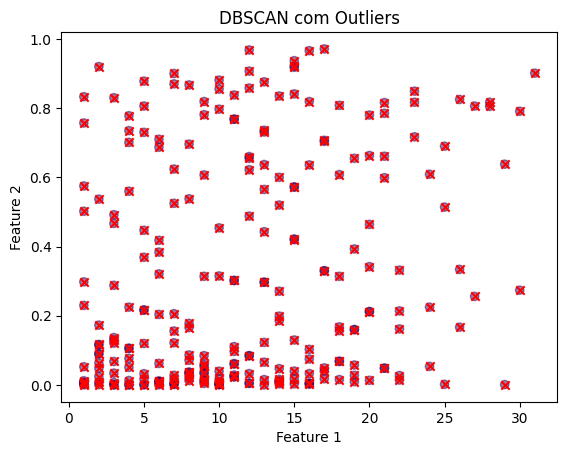

In [14]:
# Aplicando o DBSCAN diretamente nos dados sem PCA e sem Feature Scaling
dbscan = DBSCAN(eps=0.5, min_samples=10)
solucao_dbscan = dbscan.fit_predict(entrada_num)

# Criando o gráfico interativo do DBSCAN
fig = px.scatter(x=entrada_num.iloc[:, 0], y=entrada_num.iloc[:, 1], color=solucao_dbscan)
fig.update_layout(title="DBSCAN com Outliers")
fig.show()

# Plotar os resultados do DBSCAN
plt.scatter(entrada_num.iloc[:, 0], entrada_num.iloc[:, 1], c=solucao_dbscan, cmap='viridis', alpha=0.5)
plt.scatter(entrada_num.iloc[solucao_dbscan == -1, 0], entrada_num.iloc[solucao_dbscan == -1, 1], c='red', marker='x')
plt.title("DBSCAN com Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Quanto mais próximo de 1 for o coeficiente de silhueta, melhor será a qualidade do agrupamento.
# Calcular o coeficiente de silhueta
silhouette = silhouette_score(entrada_num, solucao)
print(f"Coeficiente de Silhueta: {silhouette}")


# Um valor menor do DBI indica uma melhor separação entre os clusters e maior coesão interna.
# Calcular o índice de Davies-Bouldin
dbi = davies_bouldin_score(entrada_num, solucao)
print(f"Índice de Davies-Bouldin: {dbi}")

# Um valor maior indica uma melhor separação entre os clusters, ou seja, os clusters são mais bem definidos.
# Calcular o índice de Calinski-Harabasz
chi = calinski_harabasz_score(entrada_num, solucao)
print(f"Índice de Calinski-Harabasz: {chi}")

Coeficiente de Silhueta: 0.23723612695192503
Índice de Davies-Bouldin: 1.0423490627031895
Índice de Calinski-Harabasz: 423.53011587066686


Quando tiramos o feature scaling, nos deparamos com o problema de que nem todos os dados estão na mesma grandeza, atrapalhando a formação de clusters e consequentemente nossas análises.<br>
Assim, o que se observa sem Feature Scaling (em um modelo sensível à escala de dados), e sem o PCA, é que o algorítmo não foi capaz de organizar as informações em vários clusters, colocando todos em um único e tratando muitos dos dados como ruído. Apesar disso, o índice de Calinski-Harabasz indica uma boa distribuição dos clusters, enquanto os outros dois discordam desta afirmação.

## Conclusão

A partir das análises é possível afirmar que o melhor modelo foi o KMeans sem PCA, que formou clusters bem definidos, mais separados e com boa compactação, verificado pelo equilíbrio entre seus índices - que demonstra boa coesão interna.

# Regressão

O dataset que está sendo utilizado para os algorítmos de regressão é o final_anime_dataset, um dataset contendo 100 animes, com seu título, gêneros e popularidade. O objetivo é estimar de acordo com os gêneros presentes no anime (magia, aventura, psicológico, comédia, drama, romance, mistério, ação e fantasia), o quão popular ele é.<br><br>
Para isso, serão utilizados 4 métodos diferentes, avaliados a partir de métricas como o R^2 para confirmar sua eficácia.

## Regressão Linear

### Regressão Linear com PCA e Feature Scaling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset
data = pd.read_csv("final_anime_dataset.csv")

entrada = data[['Genre: magic', 'Genre: adventure', 'Genre: psychological',
       'Genre: comedy', 'Genre: drama', 'Genre: romance', 'Genre: mystery',
       'Genre: action', 'Genre: fantasy']]

saida = data['Rating']

# Escalonar as features
scaler = StandardScaler()
entrada_padronizada = scaler.fit_transform(entrada)

# Reduzir a dimensionalidade com PCA
pca = PCA(n_components=2)
duas_dimensoes = pca.fit_transform(entrada_padronizada)

# Dividir o conjunto de dados em treino e teste
entrada_train, entrada_test, saida_train, saida_test = train_test_split(duas_dimensoes, saida, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
regressao = LinearRegression()
regressao.fit(entrada_train, saida_train)

# Coeficientes da regressão
a = regressao.coef_
b = regressao.intercept_

print("Coeficiente Angular:", a, "\nCoeficiente Linear:", b)

# Fazer previsões
previsao = regressao.predict(entrada_test)

Coeficiente Angular: [-0.01235943  0.02362891] 
Coeficiente Linear: 8.581735282604365


In [17]:
# Avaliar o modelo
# R² Score
r2 = r2_score(saida_test, previsao)
print("R² Score:", r2)

# MAE - Mean Absolute Error
mae = mean_absolute_error(saida_test, previsao)
print("MAE (Mean Absolute Error):", mae)

# MAPE - Mean Absolute Percentage Error
# Multiplicamos por 100 para obter o valor em porcentagem
mape = np.mean(np.abs((saida_test - previsao) / saida_test)) * 100
print("MAPE (Mean Absolute Percentage Error):", mape)

# MSE - Mean Squared Error
mse = mean_squared_error(saida_test, previsao)
print("MSE (Mean Squared Error):", mse)

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE (Root Mean Squared Error):", rmse)

R² Score: 0.017008351448746017
MAE (Mean Absolute Error): 0.1401313521702458
MAPE (Mean Absolute Percentage Error): 1.6077703821811913
MSE (Mean Squared Error): 0.03383457254313419
RMSE (Root Mean Squared Error): 0.1839417639991913


Este modelo apresenta um R² muito baixo (0.017), o que indica que ele explica apenas 1.7% da variância dos dados; dessa forma, tem-se que não foi um modelo muito eficaz.

### Regressão Linear sem PCA e sem Feature Scaling

In [18]:
import pandas as pd

# Carregar o dataset
data = pd.read_csv("final_anime_dataset.csv")

entrada = data[['Genre: magic', 'Genre: adventure', 'Genre: psychological',
       'Genre: comedy', 'Genre: drama', 'Genre: romance', 'Genre: mystery',
       'Genre: action', 'Genre: fantasy']]

saida = data['Rating']

# Dividir o conjunto de dados em treino e teste
entrada_train, entrada_test, saida_train, saida_test = train_test_split(entrada, saida, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
regressao = LinearRegression()
regressao.fit(entrada_train, saida_train)


# Coeficientes da regressão
a = regressao.coef_
b = regressao.intercept_

print("Coeficiente Angular:", a, "\nCoeficiente Linear:", b)

# Fazer previsões
previsao = regressao.predict(entrada_test)

# calcula a precisao das previsoes
precisao = regressao.score(entrada_test, saida_test)
print("Precisão: ", precisao)

Coeficiente Angular: [ 0.06934637  0.09628741  0.08977991  0.01752764  0.04787826 -0.04783842
  0.02049373  0.00051403 -0.10260156] 
Coeficiente Linear: 8.51911931788078
Precisão:  0.09955643409540427


In [ ]:
# Avaliar o modelo
# R² Score
r2 = r2_score(saida_test, previsao)
print("R² Score:", r2)

# MAE - Mean Absolute Error
mae = mean_absolute_error(saida_test, previsao)
print("MAE (Mean Absolute Error):", mae)

# MAPE - Mean Absolute Percentage Error
mape = np.mean(np.abs((saida_test - previsao) / saida_test)) * 100
print("MAPE (Mean Absolute Percentage Error):", mape)

# MSE - Mean Squared Error
mse = mean_squared_error(saida_test, previsao)
print("MSE (Mean Squared Error):", mse)

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE (Root Mean Squared Error):", rmse)

R² Score: 0.09955643409540427
MAE (Mean Absolute Error): 0.12285528338363978
MAPE (Mean Absolute Percentage Error): 1.4040634249812902
MSE (Mean Squared Error): 0.03099326753843621
RMSE (Root Mean Squared Error): 0.17604904867234078


O que se observa é um R^2 melhor que para o mesmo modelo de regressão linear, assim, conclui-se que a aplicação de PCA e Feature Scaling pode ter prejudicado um pouco o modelo - e que o modelo provavelmente não explica muito a variância dos dados. Porém, apesar disso, o MSE é muito próximo de 0, indicando que os valores previstos são próximos do real.

## KNN

### KNN com PCA e Feature Scaling

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar o dataset
data = pd.read_csv("final_anime_dataset.csv")

# Selecionar as colunas de entrada e saída
entrada = data[['Genre: magic', 'Genre: adventure', 'Genre: psychological',
                'Genre: comedy', 'Genre: drama', 'Genre: romance', 'Genre: mystery',
                'Genre: action', 'Genre: fantasy']]
saida = data['Rating']

# Escalonar as features
scaler = StandardScaler()
entrada = scaler.fit_transform(entrada)

# Reduzir a dimensionalidade com PCA
pca = PCA(n_components=2)  
entrada = pca.fit_transform(entrada)

# Dividir o conjunto de dados em treino e teste
entrada_train, entrada_test, saida_train, saida_test = train_test_split(entrada, saida, test_size=0.2, random_state=42)

# Treinar o modelo de KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)  
knn.fit(entrada_train, saida_train)

# Fazer previsões
previsao = knn.predict(entrada_test)

In [ ]:
# Avaliar o modelo
# R² Score
r2 = r2_score(saida_test, previsao)
print("R² Score:", r2)

# MAE - Mean Absolute Error
mae = mean_absolute_error(saida_test, previsao)
print("MAE (Mean Absolute Error):", mae)

# MAPE - Mean Absolute Percentage Error
mape = np.mean(np.abs((saida_test - previsao) / saida_test)) * 100
print("MAPE (Mean Absolute Percentage Error):", mape)

# MSE - Mean Squared Error
mse = mean_squared_error(saida_test, previsao)
print("MSE (Mean Squared Error):", mse)

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE (Root Mean Squared Error):", rmse)

R² Score: 0.042789076118533664
MAE (Mean Absolute Error): 0.13460000000000044
MAPE (Mean Absolute Percentage Error): 1.5467311152943233
MSE (Mean Squared Error): 0.0329472000000001
RMSE (Root Mean Squared Error): 0.18151363585141503


O mesmo é observado para o KNN, pouca explicação sobre a variância dos dados, porém um baixo índice de erro também.

### KNN sem PCA e sem Feature Scaling

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar o dataset
data = pd.read_csv("final_anime_dataset.csv")

# Selecionar as colunas de entrada e saída
entrada = data[['Genre: magic', 'Genre: adventure', 'Genre: psychological',
                'Genre: comedy', 'Genre: drama', 'Genre: romance', 'Genre: mystery',
                'Genre: action', 'Genre: fantasy']]
saida = data['Rating']

# Dividir o conjunto de dados em treino e teste
entrada_train, entrada_test, saida_train, saida_test = train_test_split(entrada, saida, test_size=0.2, random_state=42)

# Treinar o modelo de KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # Você pode ajustar o número de vizinhos
knn.fit(entrada_train, saida_train)

# Fazer previsões
previsao = knn.predict(entrada_test)

In [23]:
# Avaliar o modelo
# R² Score
r2 = r2_score(saida_test, previsao)
print("R² Score:", r2)

# MAE - Mean Absolute Error
mae = mean_absolute_error(saida_test, previsao)
print("MAE (Mean Absolute Error):", mae)

# MAPE - Mean Absolute Percentage Error
# Multiplicamos por 100 para obter o valor em porcentagem
mape = np.mean(np.abs((saida_test - previsao) / saida_test)) * 100
print("MAPE (Mean Absolute Percentage Error):", mape)

# MSE - Mean Squared Error
mse = mean_squared_error(saida_test, previsao)
print("MSE (Mean Squared Error):", mse)

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE (Root Mean Squared Error):", rmse)

R² Score: 0.03187681580476698
MAE (Mean Absolute Error): 0.13999999999999996
MAPE (Mean Absolute Percentage Error): 1.6107392765625606
MSE (Mean Squared Error): 0.033322799999999944
RMSE (Root Mean Squared Error): 0.18254533683444216


Remover o PCA não interferiu muito nos resultados, demonstrando que para a análise por KNN a orgaanização e escalonamento dos dados pode ter pouca influência.

## Regressão Polimnomial

### Regressão Polinomial com PCA e Feature Scaling

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Carregar o dataset
data = pd.read_csv("final_anime_dataset.csv")

# Selecionar as colunas numéricas para entrada
entrada = data[['Genre: magic', 'Genre: adventure', 'Genre: psychological',
                'Genre: comedy', 'Genre: drama', 'Genre: romance', 
                'Genre: mystery', 'Genre: action', 'Genre: fantasy']]
saida = data['Rating']

# Dividir o conjunto de dados em treino e teste
entrada_train, entrada_test, saida_train, saida_test = train_test_split(entrada, saida, test_size=0.2, random_state=42)

# Definir o pipeline com feature scaling, PCA e regressão polinomial
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2)),  
    ("poly_features", PolynomialFeatures(degree=2)),  # Ajuste o grau da regressão polinomial
    ("regressor", LinearRegression())
])

# Treinar o modelo
pipeline.fit(entrada_train, saida_train)

# Fazer previsões
previsao = pipeline.predict(entrada_test)


In [25]:
# Avaliar o modelo
# R² Score
r2 = r2_score(saida_test, previsao)
print("R² Score:", r2)

# MAE - Mean Absolute Error
mae = mean_absolute_error(saida_test, previsao)
print("MAE (Mean Absolute Error):", mae)

# MAPE - Mean Absolute Percentage Error
mape = np.mean(np.abs((saida_test - previsao) / saida_test)) * 100
print("MAPE (Mean Absolute Percentage Error):", mape)

# MSE - Mean Squared Error
mse = mean_squared_error(saida_test, previsao)
print("MSE (Mean Squared Error):", mse)

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE (Root Mean Squared Error):", rmse)

R² Score: 0.01963534025743041
MAE (Mean Absolute Error): 0.14024759008204848
MAPE (Mean Absolute Percentage Error): 1.6078937224262675
MSE (Mean Squared Error): 0.03374415158833927
RMSE (Root Mean Squared Error): 0.18369581265869747


### Regressão Polinomial sem PCA e sem Feature Scaling

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Carregar o dataset
data = pd.read_csv("final_anime_dataset.csv")

# Selecionar as colunas numéricas para entrada
entrada = data[['Genre: magic', 'Genre: adventure', 'Genre: psychological',
                'Genre: comedy', 'Genre: drama', 'Genre: romance', 
                'Genre: mystery', 'Genre: action', 'Genre: fantasy']]
saida = data['Rating']

# Dividir o conjunto de dados em treino e teste
entrada_train, entrada_test, saida_train, saida_test = train_test_split(entrada, saida, test_size=0.2, random_state=42)

# Gerar características polinomiais
poly_features = PolynomialFeatures(degree=2)  # Ajuste o grau conforme necessário
entrada_train_poly = poly_features.fit_transform(entrada_train)
entrada_test_poly = poly_features.transform(entrada_test)

# Treinar o modelo
regressor = LinearRegression()
regressor.fit(entrada_train_poly, saida_train)

# Fazer previsões
previsao = regressor.predict(entrada_test_poly)

In [27]:
# Avaliar o modelo
# R² Score
r2 = r2_score(saida_test, previsao)
print("R² Score:", r2)

# MAE - Mean Absolute Error
mae = mean_absolute_error(saida_test, previsao)
print("MAE (Mean Absolute Error):", mae)

# MAPE - Mean Absolute Percentage Error
mape = np.mean(np.abs((saida_test - previsao) / saida_test)) * 100
print("MAPE (Mean Absolute Percentage Error):", mape)

# MSE - Mean Squared Error
mse = mean_squared_error(saida_test, previsao)
print("MSE (Mean Squared Error):", mse)

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE (Root Mean Squared Error):", rmse)

R² Score: -0.2339427131889178
MAE (Mean Absolute Error): 0.1452488888888884
MAPE (Mean Absolute Percentage Error): 1.6642785307182681
MSE (Mean Squared Error): 0.04247230818796259
RMSE (Root Mean Squared Error): 0.20608810782760512


Para a Regressão Polinomial os dados indicam que o modelo não está capturando bem a relação entre as variáveis de entrada e a saída.<br>
A presença de um R² negativo e valores de erro elevados no MAPE e RMSE indica a necessidade de ajustes, como ajustar os hiperparâmetros, experimentar diferentes algoritmos de regressão, ou realizar melhorias na transformação e pré-processamento dos dados.<br>
Isso demonstra que os dados da relação entre a popularidade dos animes e seus gêneros não possuem uma relação polinomial.
<br>Apesar disso, nna versão incluindo o PCA com numero de dimensões sendo 2, o R^2 score foi positivo, mas ainda assim muito baixo, sendo 0,019, o que indica baixa adequação deste modelo


## Gradient Boosting Regressor

### Gradient Boosting Regressor com PCA e Feature Scaling

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar o dataset
data = pd.read_csv("final_anime_dataset.csv")

# Selecionar as colunas de entrada
entrada = data[['Genre: magic', 'Genre: adventure', 'Genre: psychological',
                'Genre: comedy', 'Genre: drama', 'Genre: romance', 
                'Genre: mystery', 'Genre: action', 'Genre: fantasy']]

# Saída
saida = data['Rating']

# Feature Scaling
scaler = StandardScaler()
entrada_scaled = scaler.fit_transform(entrada)

# Aplicando PCA para reduzir a dimensionalidade
pca = PCA(n_components=2) 
entrada_pca = pca.fit_transform(entrada_scaled)

# Dividir o conjunto de dados em treino e teste
entrada_train, entrada_test, saida_train, saida_test = train_test_split(entrada_pca, saida, test_size=0.2)

# Criar e treinar o modelo de Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators = 20, random_state= 0,learning_rate=0.1)
gbr.fit(entrada_train, saida_train)

# Fazer previsões
previsao = gbr.predict(entrada_test)

In [30]:
# Avaliar o modelo
# R² Score
r2 = r2_score(saida_test, previsao)
print("R² Score:", r2)

# MAE - Mean Absolute Error
mae = mean_absolute_error(saida_test, previsao)
print("MAE (Mean Absolute Error):", mae)

# MAPE - Mean Absolute Percentage Error
mape = np.mean(np.abs((saida_test - previsao) / saida_test)) * 100
print("MAPE (Mean Absolute Percentage Error):", mape)

# MSE - Mean Squared Error
mse = mean_squared_error(saida_test, previsao)
print("MSE (Mean Squared Error):", mse)

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE (Root Mean Squared Error):", rmse)

R² Score: -0.4185268394835322
MAE (Mean Absolute Error): 0.16586371086938892
MAPE (Mean Absolute Percentage Error): 1.923190244584682
MSE (Mean Squared Error): 0.044114411549388416
RMSE (Root Mean Squared Error): 0.21003431040996234


### Gradient Boosting Regressor sem PCA e sem Feature Scaling

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar o dataset
data = pd.read_csv("final_anime_dataset.csv")

# Selecionar as colunas de entrada
entrada = data[['Genre: magic', 'Genre: adventure', 'Genre: psychological',
                'Genre: comedy', 'Genre: drama', 'Genre: romance', 
                'Genre: mystery', 'Genre: action', 'Genre: fantasy']]

# Saída
saida = data['Rating']

# Dividir o conjunto de dados em treino e teste
entrada_train, entrada_test, saida_train, saida_test = train_test_split(entrada, saida, test_size=0.2)

# Criar e treinar o modelo de Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators = 20, random_state= 0,learning_rate=0.1)
gbr.fit(entrada_train, saida_train)

# Fazer previsões
previsao = gbr.predict(entrada_test)

In [45]:
# Avaliar o modelo
# R² Score
r2 = r2_score(saida_test, previsao)
print("R² Score:", r2)

# MAE - Mean Absolute Error
mae = mean_absolute_error(saida_test, previsao)
print("MAE (Mean Absolute Error):", mae)

# MAPE - Mean Absolute Percentage Error
mape = np.mean(np.abs((saida_test - previsao) / saida_test)) * 100
print("MAPE (Mean Absolute Percentage Error):", mape)

# MSE - Mean Squared Error
mse = mean_squared_error(saida_test, previsao)
print("MSE (Mean Squared Error):", mse)

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE (Root Mean Squared Error):", rmse)

R² Score: -0.07161800036285837
MAE (Mean Absolute Error): 0.15958531238652363
MAPE (Mean Absolute Percentage Error): 1.839946431982307
MSE (Mean Squared Error): 0.04231042560382654
RMSE (Root Mean Squared Error): 0.20569498196073366


Para ambos os casos o que se observa são valores negativos, com e sem o uso do PCA, que indica desempenho abaixo do esperado. Isso sugere que os modelos não se adequam, ou mesmo que a informação de popularidade dos animes não tem relação com os generos presentes na obra.

## Conclusão

O melhor modelo foi o regressão linear sem utilização do PCA, o que indica que a presença do PCA pode ter prejudicado as análises. Apesar disso, ainda não foi um bom resultado, sendo R^2 muito distante de 1 (0,099). Isso indica que provavelmente a popularidade dos animes não está diretamente relaciona aos generos presentes na obra, mas talvez a outos assuntos que abordem. Além disso, diferentes gêneros fazem sucesso com diferentes públicos, então a quantidade de fãs de determinado gênero talvez tivesse que ser levada em conta também para a popularidade geral do anime.

# Classificação

Para os algorítmos de aprendizado de máquina para classificação será utilizado o dataset dos dinossauros. O objetivo é que o algorítmo seja capaz de identificar a partir das características dadas, se o dinossauro é herbivoro, carnívoro ou ornívoro. As características que serão fornecidas são período, onde viveram, tipo, tamanho e taxonomia.

## SVN

### SVN sem PCA e sem Feature Scaling

In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
import pandas as pd

# Carregar os dados
data = pd.read_csv("dinosaurs_cleaned.csv")

# Remover linhas com valores nulos
data = data.dropna()

# Selecionar as variáveis de entrada
entrada = data.iloc[:, 2:7]  # período, onde viveram, tipo, tamanho, taxonomia
saida = data.iloc[:, 1]  # Nome do dinossauro

# Transformar as variáveis categóricas em numéricas
label_encoder = LabelEncoder()
saida = label_encoder.fit_transform(saida)
entrada = pd.get_dummies(entrada, drop_first=True)

In [74]:
# Procurando o modelo mais adequado (mais perto de 1)
model = svm.SVC(kernel="rbf", gamma='auto', C=15)
model.fit(entrada, saida)
print("Model score tentativa = ", model.score(entrada, saida))

model = svm.SVC(kernel="rbf", gamma='scale', C=15)
model.fit(entrada, saida)
print("Model score tentativa = ", model.score(entrada, saida))

model = svm.SVC(kernel="sigmoid", gamma='auto', C=15)
model.fit(entrada, saida)
print("Model score tentativa = ", model.score(entrada, saida))

model = svm.SVC(kernel="sigmoid", gamma='scale', C=40)
model.fit(entrada, saida)
print("Model score tentativa = ", model.score(entrada, saida))

model = svm.SVC(kernel="poly", degree=20, gamma='scale', C=0.5)
model.fit(entrada, saida)
print("Model score tentativa = ", model.score(entrada, saida))

Model score tentativa =  0.9187279151943463
Model score tentativa =  1.0
Model score tentativa =  0.901060070671378
Model score tentativa =  0.9434628975265018
Model score tentativa =  0.9151943462897526


In [75]:
# Depois de escolhido o modelo, foi feita uma separação entre treinamento e teste do dataset
from sklearn.model_selection import train_test_split

entrada_treinamento, entrada_teste, saida_treinamento, saida_teste = train_test_split(entrada, saida, test_size=0.30, stratify=saida)

In [76]:
# Treinamento utilizando o modelo escolhido
model = svm.SVC(kernel="rbf", gamma='scale', C=15)
model.fit(entrada_treinamento, saida_treinamento)

SVC(C=15)

In [77]:
from sklearn.metrics import classification_report

previsto = model.predict(entrada_teste)

print(classification_report(saida_teste, previsto))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.98      0.96      0.97        50
           2       0.50      0.50      0.50         8

    accuracy                           0.91        85
   macro avg       0.79      0.80      0.79        85
weighted avg       0.91      0.91      0.91        85



Com isso, é possível notar que o modelo foi bem treinado e que ele consegue acertar a dieta dos dinossauros com uma precisão razoável, seja em questao de precisão, acurácia ou recall. Assim, ainda há alguns erros nas classificações, mas no geral ele é capaz de identificar com base nas características dadas, qual a dieta do dinossauro em questão.

### SVN com PCA e Feature Scaling

In [78]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Carregar os dados
data = pd.read_csv("dinosaurs_cleaned.csv")

# Remover linhas com valores nulos
data = data.dropna()

# Selecionar as variáveis de entrada
entrada = data.iloc[:, 2:7]  # período, onde viveram, tipo, tamanho, taxonomia
saida = data.iloc[:, 1]  # Nome do dinossauro

# Transformar as variáveis categóricas em numéricas
label_encoder = LabelEncoder()
saida = label_encoder.fit_transform(saida)
entrada = pd.get_dummies(entrada, drop_first=True)

# Feature Scaling (Padronização)
scaler = StandardScaler()
entrada_scaled = scaler.fit_transform(entrada)

# Aplicando PCA para redução de dimensionalidade
pca = PCA(n_components=2)  
entrada_pca = pca.fit_transform(entrada_scaled)


In [79]:
# Procurando o modelo mais adequado (mais perto de 1)
model = svm.SVC(kernel="rbf", gamma='auto', C=15)
model.fit(entrada, saida)
print("Model score tentativa = ", model.score(entrada, saida))

model = svm.SVC(kernel="rbf", gamma='scale', C=15)
model.fit(entrada, saida)
print("Model score tentativa = ", model.score(entrada, saida))

model = svm.SVC(kernel="sigmoid", gamma='auto', C=15)
model.fit(entrada, saida)
print("Model score tentativa = ", model.score(entrada, saida))

model = svm.SVC(kernel="sigmoid", gamma='scale', C=40)
model.fit(entrada, saida)
print("Model score tentativa = ", model.score(entrada, saida))

model = svm.SVC(kernel="poly", degree=20, gamma='scale', C=0.5)
model.fit(entrada, saida)
print("Model score tentativa = ", model.score(entrada, saida))

Model score tentativa =  0.9187279151943463
Model score tentativa =  1.0
Model score tentativa =  0.901060070671378
Model score tentativa =  0.9434628975265018
Model score tentativa =  0.9151943462897526


In [80]:

# Separando entre treinamento e teste com a divisão estratificada
entrada_treinamento, entrada_teste, saida_treinamento, saida_teste = train_test_split(entrada_pca, saida, test_size=0.30, stratify=saida)

In [81]:
# Treinamento utilizando o modelo escolhido (SVM com kernel RBF)
model = svm.SVC(kernel="rbf", gamma='scale', C=15)
model.fit(entrada_treinamento, saida_treinamento)

SVC(C=15)

In [82]:

# Avaliação do modelo
previsto = model.predict(entrada_teste)
print(classification_report(saida_teste, previsto))

              precision    recall  f1-score   support

           0       0.71      0.37      0.49        27
           1       0.68      0.94      0.79        50
           2       1.00      0.25      0.40         8

    accuracy                           0.69        85
   macro avg       0.80      0.52      0.56        85
weighted avg       0.72      0.69      0.66        85



Utilizando-se o mesmo modelo do treinamento sem PCA e sem Feature Scaling, que também foi o que obteve melhor resultado aqui, o que se observa é uma queda drástica da precisão, acurácia e recall do modelo.<br>
Assim, pode-se concluir e com este dataset dos dinosauros e para o SVM no geral, a utilização do PCA não se faz necessária, e mesmo o Feature Scaling não faz falta. <br><br>
Neste modelo o que se observa é que ainda há muitos erros de classificação entre os tipos de dieta dos dinossauros, com muitas classificações falsas, o que é muito reduzido ao se remover o PCA e Feature Scaling (que foi feito inicialmente)

## Naive Bayes

### Naive Bayes sem PCA e sem Feature Scaling

In [83]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

# Carregar os dados
data = pd.read_csv("dinosaurs_cleaned.csv")

# Remover linhas com valores nulos
data = data.dropna()

entrada = data.iloc[:, 2:7]  # Seleciona as colunas período, onde viveram, tipo, tamanho, taxonomia
saida = data.iloc[:, 1] 

# Transformar as variáveis categóricas em numéricas
label_encoder = LabelEncoder()
saida = label_encoder.fit_transform(saida)  # Encoder para a variável de saída

# Realizar o encoding das variáveis categóricas na entrada
entrada = pd.get_dummies(entrada, drop_first=True)  # Converte as variáveis categóricas em variáveis numéricas


In [84]:

# Dividir os dados em treino e teste
entrada_treinamento, entrada_teste, saida_treinamento, saida_teste = train_test_split(entrada, saida, test_size=0.30)

In [85]:
# Treinar o modelo Naive Bayes
modelo = GaussianNB()
modelo.fit(entrada_treinamento, saida_treinamento)

GaussianNB()

In [86]:
# Fazer previsões com o modelo
predictions = modelo.predict(entrada_teste)

print(predictions)

# Probabilidade das previsoes
predictions = modelo.predict_proba(entrada_teste)

print(predictions)

[1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 2 1 0 1 0 1 1 0 0 1 0 0
 0 1 1 1 1 1 1 0 1 1 0 0 2 1 1 1 1 0 2 1 1 1 1 1 0 1 0 1 0 0 1 0 1 2 2 0 0
 2 1 1 1 1 0 1 0 0 0 1]
[[0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [0.000000

In [87]:
from sklearn.metrics import classification_report

# realiza a predição e imprime o relatório de classificação
print(classification_report(saida_teste, modelo.predict(entrada_teste)))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       1.00      0.95      0.97        55
           2       0.67      0.67      0.67         6

    accuracy                           0.93        85
   macro avg       0.84      0.86      0.85        85
weighted avg       0.93      0.93      0.93        85



Observa-se a partir do relatório de classificação que este modelo obteve um bom nível de treinamento. Apesar de em alguns pontos ele poder ainda melhorar, principalmente sobre a classe 2, dos dinossauros ornívoros, ele ainda possui uma boa precisão e acurácia, tendo uma grande porcentagem de acertos.

### Naive Bayes com PCA e Feature Scaling

In [88]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

# Carregar os dados
data = pd.read_csv("dinosaurs_cleaned.csv")

# Remover linhas com valores nulos
data = data.dropna()

entrada = data.iloc[:, 2:7]  # Seleciona as colunas período, onde viveram, tipo, tamanho, taxonomia
saida = data.iloc[:, 1] 

# Transformar as variáveis categóricas em numéricas
label_encoder = LabelEncoder()
saida = label_encoder.fit_transform(saida)  # Encoder para a variável de saída

# Realizar o encoding das variáveis categóricas na entrada
entrada = pd.get_dummies(entrada, drop_first=True)  # Converte as variáveis categóricas em variáveis numéricas


# Escalonar os dados de entrada
scaler = StandardScaler()
entrada_escalada = scaler.fit_transform(entrada)

# Aplicar PCA para reduzir a dimensionalidade
pca = PCA(n_components=0.95)  # Retém 95% da variância
entrada_pca = pca.fit_transform(entrada_escalada)

In [89]:
# Dividir os dados em conjuntos de treino e teste
entrada_treinamento, entrada_teste, saida_treinamento, saida_teste = train_test_split(entrada_pca, saida, test_size=0.30, stratify=saida)

In [90]:
# Treinar o modelo Naive Bayes
modelo = GaussianNB()
modelo.fit(entrada_treinamento, saida_treinamento)

GaussianNB()

In [91]:
# Fazer previsões com o modelo
predictions = modelo.predict(entrada_teste)
print(predictions)

# Probabilidade das previsões
predictions_proba = modelo.predict_proba(entrada_teste)
print(predictions_proba)

[1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 0 0 1 1 1 0 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 2 1 1
 1 0 0 1 1 1 1 1 1 1 1]
[[1.27507638e-18 1.00000000e+00 4.43580428e-36]
 [9.99999981e-01 1.90735408e-08 7.54911842e-20]
 [9.57921233e-26 1.00000000e+00 5.54649852e-62]
 [1.74083988e-16 1.00000000e+00 1.50091372e-23]
 [6.00134747e-01 0.00000000e+00 3.99865253e-01]
 [3.63051637e-14 1.00000000e+00 1.92769622e-15]
 [1.69646030e-07 9.99999830e-01 2.00470637e-20]
 [1.81419543e-15 1.00000000e+00 1.90250813e-46]
 [2.07009899e-16 1.00000000e+00 1.23140211e-44]
 [6.01267459e-09 9.99999994e-01 4.50248749e-36]
 [6.78422055e-17 1.00000000e+00 1.10505556e-57]
 [2.77509867e-11 1.00000000e+00 1.13362247e-31]
 [9.83293481e-11 1.00000000e+00 1.76378374e-34]
 [1.87318504e-14 1.00000000e+00 1.17309940e-26]
 [2.44283232e-22 1.00000000e+00 2.35116408e-33]
 [5.12876294e-14 1.00000000e+00 7.33697511e-20]
 [1.35758776e-16 1.00000000e+00 1.88048010e-25]
 [7.025239

In [92]:
# Avaliar o modelo com relatório de classificação
print(classification_report(saida_teste, predictions))

              precision    recall  f1-score   support

           0       0.36      0.15      0.21        27
           1       0.61      0.86      0.72        50
           2       0.25      0.12      0.17         8

    accuracy                           0.56        85
   macro avg       0.41      0.38      0.36        85
weighted avg       0.50      0.56      0.50        85



Como visto pelo relatório de classificação, o modelo com PCA e com Feature Scaling teve um baixo desempenho em classificar corretamente o tipo de dieta dos dinossauros, com uma queda significativa na acurácia e em várias métricas para as classes, especialmente a classe 0 e a classe 2.<br>
Embora o recall da classe 1 tenha melhorado, o modelo geral com PCA e Feature Scaling teve um desempenho mais fraco.<br>
A técnica de PCA e Feature Scaling pode ser útil em alguns casos para melhorar o desempenho, mas para a análise deste dataset com este método ela piorou o desempenho, provavelmente devido à perda de informações durante a redução dimensional e ao efeito do escalonamento das características.

## KNN

### KNN sem PCA e sem Feature Scaling

In [93]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Carregar os dados
data = pd.read_csv("dinosaurs_cleaned.csv")

# Remover linhas com valores nulos
data = data.dropna()

# Selecionar as variáveis de entrada e saída
entrada = data.iloc[:, 2:7]  # Seleciona as colunas período, onde viveram, tipo, tamanho, taxonomia
saida = data.iloc[:, 1]

# Transformar a variável de saída em numérica
label_encoder = LabelEncoder()
saida = label_encoder.fit_transform(saida)

# Transformar as variáveis categóricas de entrada em numéricas
entrada = pd.get_dummies(entrada, drop_first=True)

In [94]:
# Dividir os dados em conjuntos de treino e teste
entrada_treinamento, entrada_teste, saida_treinamento, saida_teste = train_test_split(entrada, saida, test_size=0.30, stratify=saida)

In [95]:

# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Ajuste o número de vizinhos conforme necessário
knn.fit(entrada_treinamento, saida_treinamento)

KNeighborsClassifier()

In [96]:
# Fazer previsões com o modelo
predictions = knn.predict(entrada_teste)
print(predictions)

[1 1 2 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 2 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1
 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 2 1 0 1 0 2 1 1 1 2 1 0 1 1
 2 1 0 0 1 1 0 1 1 1 0]


In [97]:
# Avaliar o modelo com relatório de classificação
print(classification_report(saida_teste, predictions))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.94      0.94      0.94        50
           2       0.50      0.38      0.43         8

    accuracy                           0.88        85
   macro avg       0.77      0.75      0.75        85
weighted avg       0.87      0.88      0.88        85



Oberva-se um desempenho razoável de precisão e acurácia para o modelo, conseguindo identificar corretamente grande parte dos tipos de dietas dos dinossauros apresentados.

### KNN com PCA e Feature Scaling

In [103]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Carregar os dados
data = pd.read_csv("dinosaurs_cleaned.csv")

# Remover linhas com valores nulos
data = data.dropna()

# Selecionar as variáveis de entrada e saída
entrada = data.iloc[:, 2:7]  # Seleciona as colunas período, onde viveram, tipo, tamanho, taxonomia
saida = data.iloc[:, 1]

# Transformar a variável de saída em numérica
label_encoder = LabelEncoder()
saida = label_encoder.fit_transform(saida)

# Transformar as variáveis categóricas de entrada em numéricas
entrada = pd.get_dummies(entrada, drop_first=True)

# Escalonar os dados de entrada
scaler = StandardScaler()
entrada_escalada = scaler.fit_transform(entrada)

# Aplicar PCA para reduzir a dimensionalidade
pca = PCA(n_components=2)  
entrada_pca = pca.fit_transform(entrada_escalada)

In [104]:
# Dividir os dados em conjuntos de treino e teste
entrada_treinamento, entrada_teste, saida_treinamento, saida_teste = train_test_split(
    entrada_pca, saida, test_size=0.30, stratify=saida
)

In [105]:
# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Ajuste o número de vizinhos conforme necessário
knn.fit(entrada_treinamento, saida_treinamento)

KNeighborsClassifier()

In [106]:
# Fazer previsões com o modelo
predictions = knn.predict(entrada_teste)
print(predictions)

[1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 2 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0
 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 2 1 1 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 0 1 1 0 1 1 1 1]


In [107]:
# Avaliar o modelo com relatório de classificação
print(classification_report(saida_teste, predictions))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54        27
           1       0.71      0.88      0.79        50
           2       0.50      0.12      0.20         8

    accuracy                           0.68        85
   macro avg       0.61      0.50      0.51        85
weighted avg       0.66      0.68      0.65        85



A classe 2 foi a mais afetada pelo uso de PCA e Feature Scaling, onde o modelo com PCA não conseguiu prever corretamente grande parte dessa classe, o que provavelmente indica uma perda de informações importantes após a redução dimensional. Isso se deve ao fato de que o dataset possui menos informações sobre dinossauros ornívoros, e no processo de preprocessamento esses dados devem ter se perdido.<br>
Assim, para este caso, observa-se mais uma vez que ao incluir PCA e Feature Scaling no algorítmo de treinamento acarreta em uma perda significativa de precisão e acurácia dos resultados.

## Regressão Logística

### Regressão Logística sem PCA e sem Feature Scaling

In [109]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Carregar os dados
data = pd.read_csv("dinosaurs_cleaned.csv")
data = data.dropna()  # Remover valores nulos

# Selecionar as colunas de entrada e saída
entrada = data.iloc[:, 2:7]
saida = data.iloc[:, 1]

# Transformar a saída para valores numéricos
label_encoder = LabelEncoder()
saida = label_encoder.fit_transform(saida)

# Codificar as variáveis categóricas da entrada
entrada = pd.get_dummies(entrada, drop_first=True)

In [110]:
# Dividir os dados em treino e teste
entrada_treinamento, entrada_teste, saida_treinamento, saida_teste = train_test_split(entrada, saida, test_size=0.30)

In [111]:
# Treinar o modelo de Regressão Logística sem escalamento e sem PCA
modelo = LogisticRegression(max_iter=1000)
modelo.fit(entrada_treinamento, saida_treinamento)

LogisticRegression(max_iter=1000)

In [112]:
# Fazer previsões e exibir o relatório de classificação
predictions = modelo.predict(entrada_teste)
print(classification_report(saida_teste, predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.96      0.98      0.97        51
           2       0.67      0.29      0.40         7

    accuracy                           0.92        85
   macro avg       0.83      0.74      0.76        85
weighted avg       0.91      0.92      0.91        85



Assim como nos outros casos, observa-se que para a classe 2, dos ornívoros, o modelo poderia ser melhorado, porém isso também é influenciado pela quantidade disproporcional de dinossauros com esse tipo de dieta. Fora isso, no geral é possível afirmar que o desempenho deste modelo é razoável, com boa precisão e acurácia.

### Regressão Logística com PCA e Feature Scaling

In [117]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Carregar os dados
data = pd.read_csv("dinosaurs_cleaned.csv")
data = data.dropna()  # Remover valores nulos

# Selecionar as colunas de entrada e saída
entrada = data.iloc[:, 2:7]
saida = data.iloc[:, 1]

# Transformar a saída para valores numéricos
label_encoder = LabelEncoder()
saida = label_encoder.fit_transform(saida)

# Codificar as variáveis categóricas da entrada
entrada = pd.get_dummies(entrada, drop_first=True)

# Escalar as características
scaler = StandardScaler()
entrada = scaler.fit_transform(entrada)

# Aplicar PCA para redução de dimensionalidade
pca = PCA(n_components=2)  # Escolher o número de componentes
entrada = pca.fit_transform(entrada)

In [118]:
# Dividir os dados em treino e teste
entrada_treinamento, entrada_teste, saida_treinamento, saida_teste = train_test_split(entrada, saida, test_size=0.30, stratify=saida)


In [119]:
# Treinar o modelo de Regressão Logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(entrada_treinamento, saida_treinamento)


LogisticRegression(max_iter=1000)

In [120]:
# Fazer previsões e exibir o relatório de classificação
predictions = modelo.predict(entrada_teste)
print(classification_report(saida_teste, predictions))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57        27
           1       0.71      0.96      0.81        50
           2       0.50      0.12      0.20         8

    accuracy                           0.72        85
   macro avg       0.67      0.51      0.53        85
weighted avg       0.72      0.72      0.68        85



Da mesma forma, para o modelo com PCA e Feature Scaling ovserva-se um decaimento da proporção de acertos do modelo, principalmente para os ornívoros.

## Gradient Boosting

### Gradient Boosting sem PCA e sem Feature Scaling

In [121]:
# Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Carregar os dados
data = pd.read_csv("dinosaurs_cleaned.csv")

# Remover linhas com valores nulos
data = data.dropna()

# Separar as variáveis de entrada e saída
entrada = data.iloc[:, 2:7]
saida = data.iloc[:, 1]

# Codificar a variável de saída
label_encoder = LabelEncoder()
saida = label_encoder.fit_transform(saida)

# Realizar o encoding das variáveis categóricas na entrada
entrada = pd.get_dummies(entrada, drop_first=True)

In [122]:
# Dividir os dados em treino e teste
entrada_treinamento, entrada_teste, saida_treinamento, saida_teste = train_test_split(entrada, saida, test_size=0.3, random_state=42)

In [123]:
# Treinar o modelo de Gradient Boosting
modelo = GradientBoostingClassifier()
modelo.fit(entrada_treinamento, saida_treinamento)

GradientBoostingClassifier()

In [124]:
# Fazer previsões e imprimir o relatório de classificação
predictions = modelo.predict(entrada_teste)
print(classification_report(saida_teste, predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        28
           1       0.98      0.94      0.96        51
           2       0.50      0.33      0.40         6

    accuracy                           0.91        85
   macro avg       0.77      0.75      0.75        85
weighted avg       0.90      0.91      0.90        85



Da mesma forma, para este modelo de Gradient Boosting, observa-se uma boa acurácia e precisão, que deixa a desejar apenas na classe dos dinossauros ornívoros, tendo um acerto de quase 100% para a classe 1 que é dos carnívoros e próxima de 90% para os herbívoros, sendo um modelo eficiente.

### Gradient Boosting com PCA e Feature Scaling

In [126]:
# Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

# Carregar os dados
data = pd.read_csv("dinosaurs_cleaned.csv")

# Remover linhas com valores nulos
data = data.dropna()

# Separar as variáveis de entrada e saída
entrada = data.iloc[:, 2:7]
saida = data.iloc[:, 1]

# Codificar a variável de saída
label_encoder = LabelEncoder()
saida = label_encoder.fit_transform(saida)

# Realizar o encoding das variáveis categóricas na entrada
entrada = pd.get_dummies(entrada, drop_first=True)

# Aplicar Feature Scaling
scaler = StandardScaler()
entrada_scaled = scaler.fit_transform(entrada)

# Aplicar PCA para reduzir para 2 componentes principais (ou ajuste conforme necessário)
pca = PCA(n_components=2)
entrada_pca = pca.fit_transform(entrada_scaled)

In [127]:
# Dividir os dados em treino e teste
entrada_treinamento, entrada_teste, saida_treinamento, saida_teste = train_test_split(entrada_pca, saida, test_size=0.3, random_state=42)

In [128]:
# Treinar o modelo de Gradient Boosting
modelo = GradientBoostingClassifier()
modelo.fit(entrada_treinamento, saida_treinamento)

GradientBoostingClassifier()

In [129]:
# Fazer previsões e imprimir o relatório de classificação
predictions = modelo.predict(entrada_teste)
print(classification_report(saida_teste, predictions))

              precision    recall  f1-score   support

           0       0.53      0.64      0.58        28
           1       0.79      0.73      0.76        51
           2       0.50      0.33      0.40         6

    accuracy                           0.67        85
   macro avg       0.61      0.57      0.58        85
weighted avg       0.68      0.67      0.67        85



Já o mesmo modelo de Gradient Boosting adicionando PCA e Feature Scaling tem um decaimento no nível de acertos. Para a classe 1, dos carnívoros, ainda está razoável, como observa-se pela sua precisão, recall e f1-score, porém para as duas outras classes deixa muito a desejar. Desta forma, o PCA e Feature Scaling deixou o modelo menos eficiente,

## Conclusão

A partir da análise de todos esses modelos é possível afirmar que ao utilizar PCA e Feature Scaling para este dataset temos uma perda significativa de dados; como para a classe 2 dos ornívoros já existem poucos exemplos, principalmente se comparados aos herbívoros e carnívoros, ao passar pelo escalonamento e redimensionamento provavelmente dados de distinção deles são perdidos, o que faz com que eles sejam classificados de forma errônea. <br>
Dinossauros ornívoros tem uma dieta misturada entre carne e vegetais, assim, com base nas características deles, o algorítmo pode confundí-los com uma das outras classes se o treinamento não for eficiente. Assim, desses casos, obervou-se um desempenho superior ao utilizar os dados de forma bruta, ou seja, sem o tratamento PCA ou Feature Scaling.
<br><br>
Além disso, vale destacar aqui que o modelo SVM sem PCA e sem Feature Scaling teve a melhor acurácia (92%) e apresentou um desempenho mais consistente em todas as classes, principalmente devido ao melhor balanceamento entre precisão e recall, sendo assim o modelo mais equilibrado e eficiente no geral, com o Gradient Boosting próximo dele também. Apesar disso, foi o modelo Naive Bayes teve o maior recall para a classe 2 (60%), porém com precisão baixa. <br>
Assim, o Gradient Boosting e o SVM se mostraram mais eficazes em captar padrões complexos, mesmo sem feature scaling, por sua capacidade de ajuste a variações nos dados, enquanto os outros demonstraram uma alta dificuldade com a classe 2, dos ornívoros, provavelmente por sua menor quantidade de exemplos no dataset.